# 线性回归的示例

TensorFlow v2库的线性回归实现

In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import tensorflow as tf
import numpy as np
rng = np.random

In [3]:
# 定义参数
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [4]:
# 训练数据
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])


In [5]:
# 权重（weight）和偏差（bias），随机初始化
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# 线性回归(Wx + b).
def linear_regression(x):
    return W * x + b


def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))  # tf.square()是张量对里面的每一个元素求平方

# 随机梯度下降优化
optimizer = tf.optimizers.SGD(learning_rate)

In [6]:
# 优化过程 
def run_optimization():
    # 在GradientTape内计算，以实现自动微分
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # 计算梯度
    gradients = g.gradient(loss, [W, b])
    
    # 根据梯度更新W和b
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [7]:
# 按照给定的步骤数进行训练
for step in range(1, training_steps + 1):
    # 运行优化以更新W和b值
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.153872, W: 0.253145, b: 0.788095
step: 100, loss: 0.153869, W: 0.252972, b: 0.789320
step: 150, loss: 0.153866, W: 0.252819, b: 0.790405
step: 200, loss: 0.153865, W: 0.252684, b: 0.791366
step: 250, loss: 0.153863, W: 0.252564, b: 0.792217
step: 300, loss: 0.153862, W: 0.252457, b: 0.792970
step: 350, loss: 0.153861, W: 0.252363, b: 0.793638
step: 400, loss: 0.153860, W: 0.252280, b: 0.794228
step: 450, loss: 0.153860, W: 0.252206, b: 0.794752
step: 500, loss: 0.153859, W: 0.252141, b: 0.795215
step: 550, loss: 0.153859, W: 0.252083, b: 0.795626
step: 600, loss: 0.153859, W: 0.252032, b: 0.795989
step: 650, loss: 0.153858, W: 0.251986, b: 0.796311
step: 700, loss: 0.153858, W: 0.251946, b: 0.796596
step: 750, loss: 0.153858, W: 0.251910, b: 0.796848
step: 800, loss: 0.153858, W: 0.251879, b: 0.797072
step: 850, loss: 0.153858, W: 0.251851, b: 0.797270
step: 900, loss: 0.153858, W: 0.251826, b: 0.797445
step: 950, loss: 0.153858, W: 0.251804, b: 0.797600
step: 1000, l

In [8]:
import matplotlib.pyplot as plt

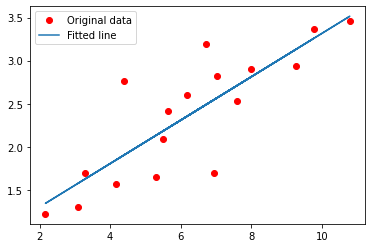

In [9]:
# 图形展示
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()